In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sks
import nltk
from nltk.corpus import stopwords
import re

In [2]:
data = pd.read_csv("Emirates Airways Reviews.csv")

In [3]:
data

,Title,Date Published,Status,Aircraft,Travel Type,Travel Class,Route,Date Flown,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Recommended,Overall Rating,Review,Country
0,"""upgrade to business class""",12th August 2024,Trip Verified,Boeing 777,Solo Leisure,Business Class,Dubai to Lisbon,August 2024,5.0,5.0,5.0,5.0,5.0,5.0,5,yes,10,I flew a return trip DXB-LIS-DXB I used my ...,United Arab Emirates
1,"""14 hour horrendous experience""",11th August 2024,Trip Verified,NaN,Couple Leisure,Economy Class,Delhi to Boston via Dubai,August 2024,1.0,1.0,3.0,3.0,2.0,3.0,2,no,4,We were 2 people travelling together and on...,India
2,"""not welcome and passengers are a burden""",29th July 2024,Not Verified,Boeing 777-300,Solo Leisure,Economy Class,Amsterdam to Phuket via Dubai,June 2024,2.0,1.0,4.0,2.0,3.0,3.0,2,no,5,"First time flying Emirates, was expecting a...",Netherlands
3,"""should be considered among the worst""",18th July 2024,Trip Verified,A380,Business,Economy Class,Manchester to Singapore via Dubai,July 2024,1.0,1.0,2.0,NaN,NaN,1.0,1,no,1,Ground Staff and Service Failures on Flight ...,Singapore
4,“services are very great”,13th July 2024,Not Verified,A380,Family Leisure,Economy Class,Bangkok to Hong Kong,August 2023,5.0,5.0,5.0,5.0,4.0,5.0,5,yes,10,The staff are friendly and the seat is comfo...,Hong Kong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,"""very disappointing flight""",31st December 2015,NaN,NaN,Solo Leisure,Economy Class,DUR to MAN via DXB,December 2015,1.0,3.0,1.0,2.0,4.0,4.0,1,no,4,Durban to Manchester via Dubai. Very disappoin...,United Kingdom
1536,"""not that impressed""",31st December 2015,NaN,Boeing 777-300ER,Couple Leisure,Business Class,BHX to DXB,December 2015,4.0,5.0,2.0,1.0,NaN,3.0,3,yes,4,Birmingham to Dubai and I was not that impress...,United Kingdom
1537,"""staff was impeccable""",28th December 2015,NaN,A380,Family Leisure,Economy Class,BNE to LHR via DXB,June 2015,4.0,5.0,4.0,5.0,2.0,4.0,4,yes,9,I have a serious phobia of flying. I flew Emir...,Australia
1538,"""new plane and great staff""",23rd December 2015,NaN,A380,Business,Economy Class,DXB to JED,November 2015,5.0,5.0,2.0,5.0,NaN,5.0,5,yes,9,Dubai to Jeddah in November on an A380. New pl...,Spain


In [4]:
data.head()

,Title,Date Published,Status,Aircraft,Travel Type,Travel Class,Route,Date Flown,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Recommended,Overall Rating,Review,Country
0,"""upgrade to business class""",12th August 2024,Trip Verified,Boeing 777,Solo Leisure,Business Class,Dubai to Lisbon,August 2024,5.0,5.0,5.0,5.0,5.0,5.0,5,yes,10,I flew a return trip DXB-LIS-DXB I used my ...,United Arab Emirates
1,"""14 hour horrendous experience""",11th August 2024,Trip Verified,NaN,Couple Leisure,Economy Class,Delhi to Boston via Dubai,August 2024,1.0,1.0,3.0,3.0,2.0,3.0,2,no,4,We were 2 people travelling together and on...,India
2,"""not welcome and passengers are a burden""",29th July 2024,Not Verified,Boeing 777-300,Solo Leisure,Economy Class,Amsterdam to Phuket via Dubai,June 2024,2.0,1.0,4.0,2.0,3.0,3.0,2,no,5,"First time flying Emirates, was expecting a...",Netherlands
3,"""should be considered among the worst""",18th July 2024,Trip Verified,A380,Business,Economy Class,Manchester to Singapore via Dubai,July 2024,1.0,1.0,2.0,NaN,NaN,1.0,1,no,1,Ground Staff and Service Failures on Flight ...,Singapore
4,“services are very great”,13th July 2024,Not Verified,A380,Family Leisure,Economy Class,Bangkok to Hong Kong,August 2023,5.0,5.0,5.0,5.0,4.0,5.0,5,yes,10,The staff are friendly and the seat is comfo...,Hong Kong


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1540 non-null   object 
 1   Date Published   1540 non-null   object 
 2   Status           1398 non-null   object 
 3   Aircraft         1037 non-null   object 
 4   Travel Type      1540 non-null   object 
 5   Travel Class     1540 non-null   object 
 6   Route            1538 non-null   object 
 7   Date Flown       1540 non-null   object 
 8   Seating Comfort  1477 non-null   float64
 9   Staff Service    1476 non-null   float64
 10  Food Quality     1418 non-null   float64
 11  Entertainment    1380 non-null   float64
 12  WiFi             934 non-null    float64
 13  Ground Service   1501 non-null   float64
 14  Value for Money  1540 non-null   int64  
 15  Recommended      1540 non-null   object 
 16  Overall Rating   1540 non-null   int64  
 17  Review        

In [6]:
data.isna().sum()

Title                0
Date Published       0
Status             142
Aircraft           503
Travel Type          0
Travel Class         0
Route                2
Date Flown           0
Seating Comfort     63
Staff Service       64
Food Quality       122
Entertainment      160
WiFi               606
Ground Service      39
Value for Money      0
Recommended          0
Overall Rating       0
Review               0
Country              0
dtype: int64

In [7]:
data.isnull().sum()

Title                0
Date Published       0
Status             142
Aircraft           503
Travel Type          0
Travel Class         0
Route                2
Date Flown           0
Seating Comfort     63
Staff Service       64
Food Quality       122
Entertainment      160
WiFi               606
Ground Service      39
Value for Money      0
Recommended          0
Overall Rating       0
Review               0
Country              0
dtype: int64

In [8]:
data.shape

(1540, 19)

In [9]:
data.columns

Index(['Title', 'Date Published', 'Status', 'Aircraft', 'Travel Type',
       'Travel Class', 'Route', 'Date Flown', 'Seating Comfort',
       'Staff Service', 'Food Quality', 'Entertainment', 'WiFi',
       'Ground Service', 'Value for Money', 'Recommended', 'Overall Rating',
       'Review', 'Country'],
      dtype='object')

In [10]:
data.describe()

,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Overall Rating
count,1477.000000,1476.000000,1418.000000,1380.000000,934.000000,1501.00000,1540.000000,1540.000000
mean,3.223426,2.977642,3.000000,3.704348,2.751606,2.85010,2.819481,4.814286
std,1.401284,1.592836,1.476707,1.376108,1.478815,1.59233,1.534489,3.331275
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000,1.000000,1.00000,1.000000,2.000000
50%,3.000000,3.000000,3.000000,4.000000,3.000000,3.00000,3.000000,4.000000
75%,4.000000,5.000000,4.000000,5.000000,4.000000,4.00000,4.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,10.000000


In [11]:
data.dropna(inplace=True)

In [12]:
# where i just reset the index 
data = data.reset_index(drop=True)

In [13]:
data.isnull().sum()

Title              0
Date Published     0
Status             0
Aircraft           0
Travel Type        0
Travel Class       0
Route              0
Date Flown         0
Seating Comfort    0
Staff Service      0
Food Quality       0
Entertainment      0
WiFi               0
Ground Service     0
Value for Money    0
Recommended        0
Overall Rating     0
Review             0
Country            0
dtype: int64

In [14]:
data

,Title,Date Published,Status,Aircraft,Travel Type,Travel Class,Route,Date Flown,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Recommended,Overall Rating,Review,Country
0,"""upgrade to business class""",12th August 2024,Trip Verified,Boeing 777,Solo Leisure,Business Class,Dubai to Lisbon,August 2024,5.0,5.0,5.0,5.0,5.0,5.0,5,yes,10,I flew a return trip DXB-LIS-DXB I used my ...,United Arab Emirates
1,"""not welcome and passengers are a burden""",29th July 2024,Not Verified,Boeing 777-300,Solo Leisure,Economy Class,Amsterdam to Phuket via Dubai,June 2024,2.0,1.0,4.0,2.0,3.0,3.0,2,no,5,"First time flying Emirates, was expecting a...",Netherlands
2,“services are very great”,13th July 2024,Not Verified,A380,Family Leisure,Economy Class,Bangkok to Hong Kong,August 2023,5.0,5.0,5.0,5.0,4.0,5.0,5,yes,10,The staff are friendly and the seat is comfo...,Hong Kong
3,"""I'd again chose EK economy""",20th June 2024,Not Verified,777-300ER / A380-800,Family Leisure,Economy Class,Delhi to Washington via Dubai,June 2024,5.0,5.0,5.0,5.0,3.0,5.0,4,yes,9,Having flown almost exclusely in business cla...,United States
4,“the worst airline I've ever flown”,26th May 2024,Trip Verified,B777-300ER,Solo Leisure,Economy Class,Tokyo to Israel via Dubai,May 2024,3.0,2.0,1.0,2.0,2.0,1.0,1,no,1,"I fly a lot, but Emirates were my worst exper...",Israel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,"""excellent customer service""",31st March 2016,Verified Review,A380,Business,Business Class,SYD to AKL,March 2016,5.0,5.0,4.0,3.0,5.0,5.0,4,yes,9,"Sydney to Auckland, and Emirates offers exce...",Australia
583,"""professional smiling crews""",30th March 2016,Verified Review,A380,Solo Leisure,Business Class,MXP to JFK,March 2016,4.0,5.0,4.0,4.0,4.0,4.0,4,yes,9,Milan Malpensa to New York JFK return in bus...,Italy
584,"""service was really bare bones""",25th March 2016,Verified Review,A380,Solo Leisure,Economy Class,LHR to MEL via DXB,March 2016,2.0,3.0,2.0,5.0,1.0,5.0,4,no,4,Tried Emirates for the first time from Londo...,United Kingdom
585,"""crew can make the difference""",25th March 2016,Verified Review,Boeing 777,Solo Leisure,Economy Class,CMN to CMB via DXB/MLE,March 2016,5.0,3.0,5.0,5.0,5.0,4.0,4,yes,7,Casablanca to Colombo via Dubai and Male wit...,Sri Lanka


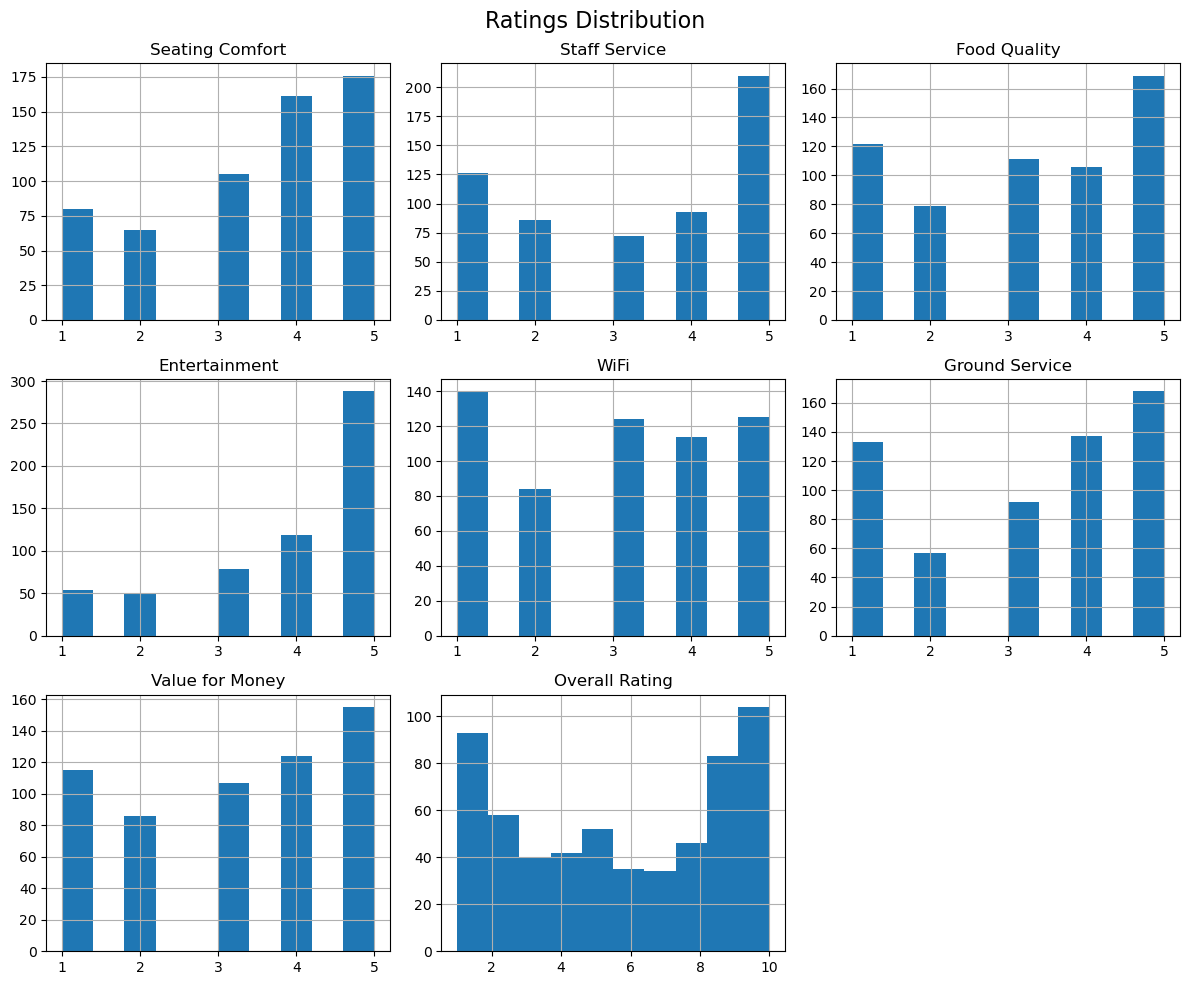

In [15]:
rating_cols = ['Seating Comfort', 'Staff Service', 'Food Quality',
               'Entertainment', 'WiFi', 'Ground Service', 'Value for Money', 'Overall Rating']
data[rating_cols].hist(figsize=(12, 10), bins=10)
plt.suptitle("Ratings Distribution", fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\S.Ahmed.Ali\AppData\Local\Temp\ipykernel_9960\4155652165.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Recommended', palette='Set2')


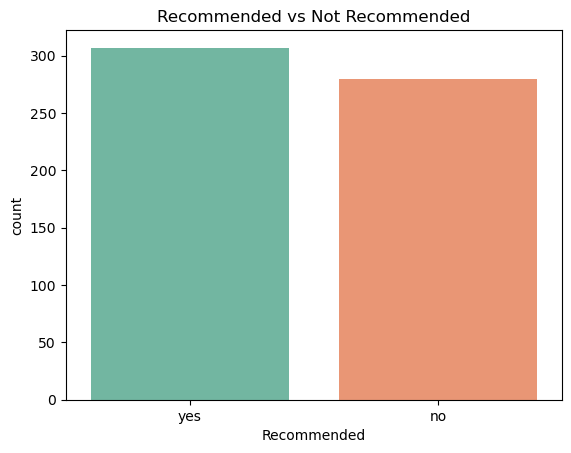

In [16]:
sns.countplot(data=data, x='Recommended', palette='Set2')
plt.title("Recommended vs Not Recommended")
plt.show()


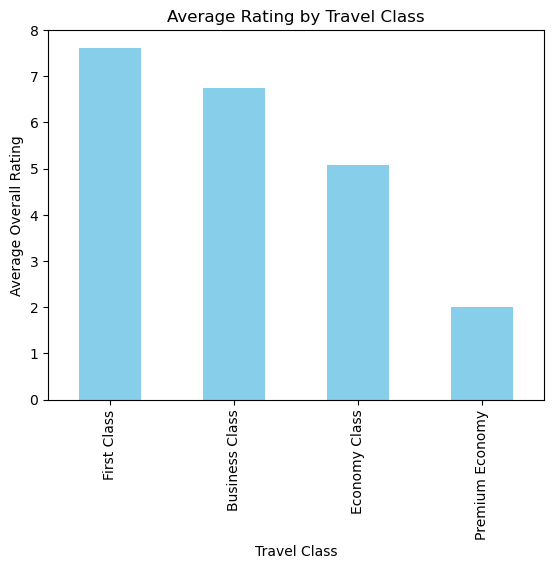

In [17]:
avg_ratings_by_class = data.groupby('Travel Class')['Overall Rating'].mean().sort_values(ascending=False)
avg_ratings_by_class.plot(kind='bar', color='skyblue')
plt.ylabel("Average Overall Rating")
plt.title("Average Rating by Travel Class")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

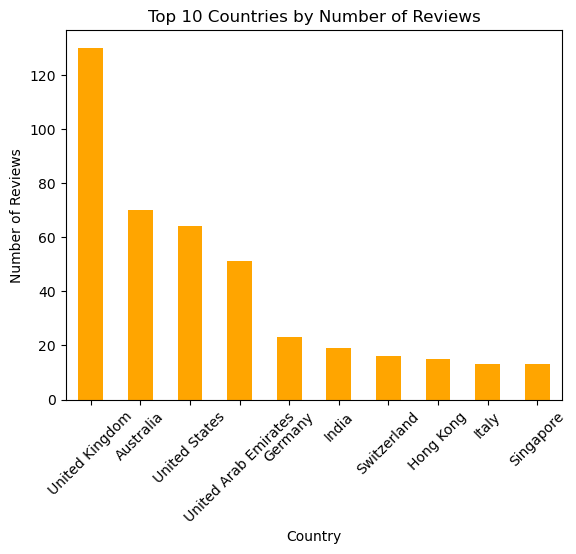

In [18]:
top_countries = data['Country'].value_counts().head(10)
top_countries.plot(kind='bar', color='orange')
plt.title("Top 10 Countries by Number of Reviews")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show

# What Specific complaints appears frequently in the "worst" review?

In [19]:
# filter reviews with rating  1 (worst reviews)
worst_reviews = data[data["Overall Rating"] ==1]

# Display the worst reviews and their co,plaint themes 
worst_complaints = worst_reviews[['Title','Review']]
print(worst_complaints)

                                    Title  \
4     “the worst airline I've ever flown”   
7              "Never fly Emirates again"   
14      "absolutely miserable experience"   
20               "ignored and overlooked"   
22          "Stay away from this airline"   
..                                    ...   
548             "what are you playing at"   
574  "misplacing luggage on both flights"   
576   "airline leaves customers stranded"   
577              "awful customer service"   
580       "journey in a class of its own"   

                                                Review  
4     I fly a lot, but Emirates were my worst exper...  
7      True color of organisation is discovered whe...  
14     I took 4 flights with Emirates and it was an...  
20    I had a poor experience on this flight. I hav...  
22     What a nightmare. Taken back to the stand an...  
..                                                 ...  
548    Gatwick to Brisbane via Dubai. Appalling ser...  
574

# What routes seem to have the best or worst WIFI and entertainment options?

In [20]:
# Where we are trying to find which routes have  the good or bad 



# Group by Route and calculate average WiFi and Entertainment scores
route_avg = data.groupby('Route')[['WiFi', 'Entertainment']].mean()

# Sort routes by WiFi and Entertainment ratings
sorted_by_wifi = route_avg.sort_values(by='WiFi', ascending=False)
sorted_by_entertainment = route_avg.sort_values(by='Entertainment', ascending=False)

# Show results
print("Routes sorted by WiFi rating:")
print(sorted_by_wifi)
print("\nRoutes sorted by Entertainment rating:")
print(sorted_by_entertainment)

Routes sorted by WiFi rating:
                                  WiFi  Entertainment
Route                                                
Hamburg to Beijing via Dubai       5.0            5.0
DEL to GRU via DXB                 5.0            5.0
DEL to LHR via DXB                 5.0            5.0
Birmingham to Auckland via Dubai   5.0            5.0
Bengaluru to Dammam via Dubai      5.0            5.0
...                                ...            ...
Brisbane to Prague via Dubai       1.0            1.0
London to Ahmedabad via Dubai      1.0            5.0
London to Dubai                    1.0            4.0
London to Durban via Dubai         1.0            5.0
AMS to DAR via DXB                 1.0            4.0

[480 rows x 2 columns]

Routes sorted by Entertainment rating:
                                             WiFi  Entertainment
Route                                                           
Hamburg to Beijing via Dubai                  5.0            5.0
Hong Kong

# how does seating comfort relate to other factors

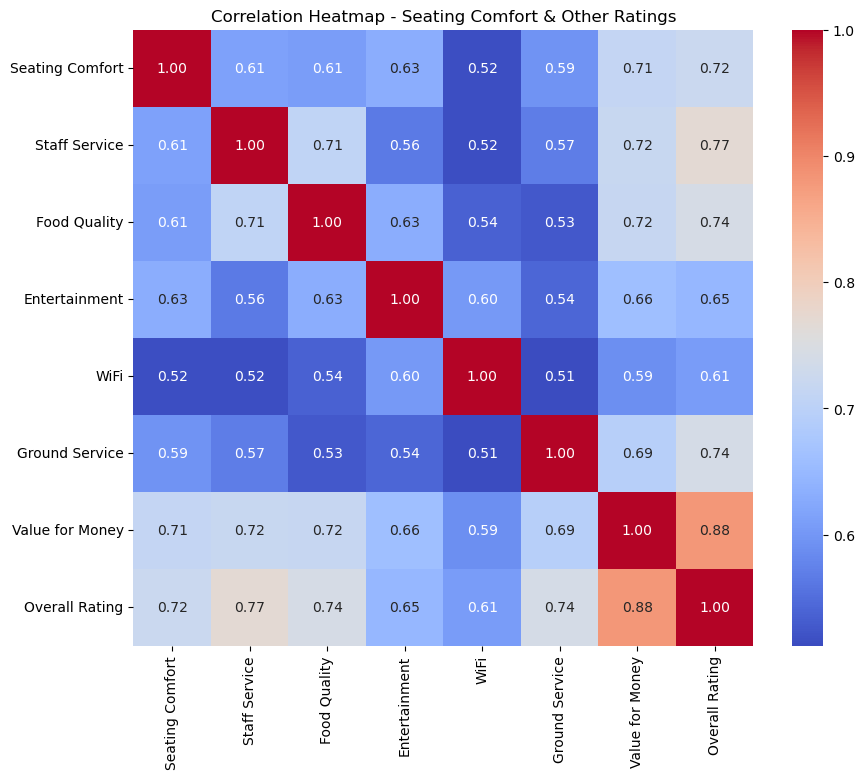

In [21]:
numeric_cols = ['Seating Comfort', 'Staff Service', 'Food Quality',
                'Entertainment', 'WiFi', 'Ground Service', 'Value for Money', 'Overall Rating']

# Compute correlation matrix
corr_matrix = data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Seating Comfort & Other Ratings")
plt.show()


In [22]:
# Average value by category
data.groupby('Value for Money')['Value for Money'].mean()

Value for Money
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
Name: Value for Money, dtype: float64

# what is the overall rating distribution across all reviews?

C:\Users\S.Ahmed.Ali\AppData\Local\Temp\ipykernel_9960\3804356025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Overall Rating', palette='viridis')


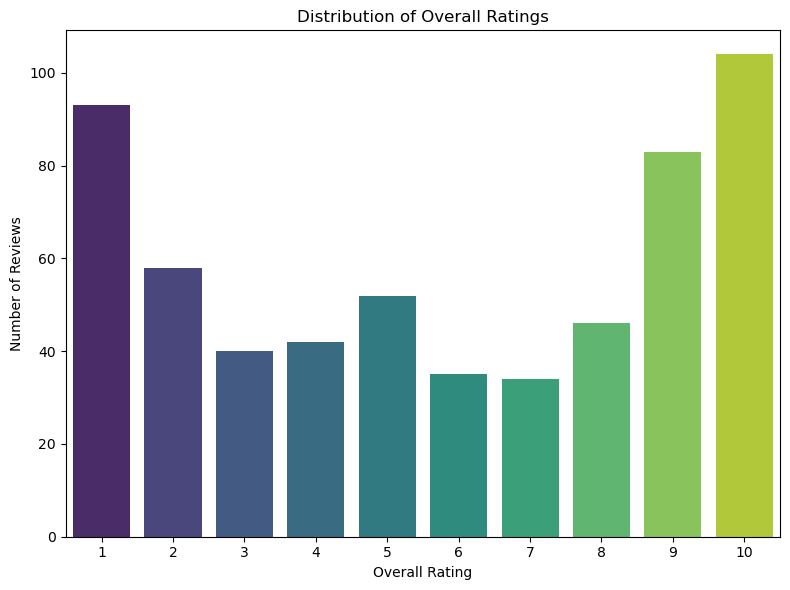

In [23]:
# Plot the distribution of overall ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Overall Rating', palette='viridis')
plt.title("Distribution of Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [24]:
rating_counts = data['Overall Rating'].value_counts().sort_index()

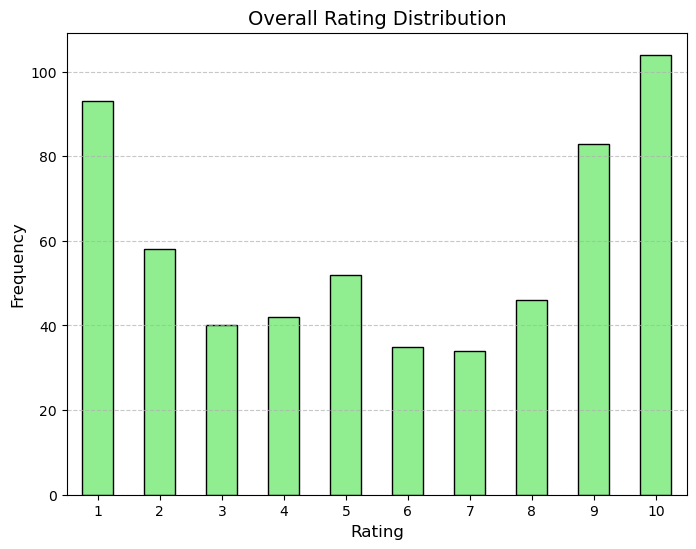

In [25]:
#Q1 : here im plotting overall rating to know  ,what's the most rating we have i.e [1,2,3,4,5,6,7,8,9,10]
 #so we are plot this in bar plot

plt.figure(figsize=(8, 6))

rating_counts.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Overall Rating Distribution', fontsize=14)

plt.xlabel('Rating', fontsize=12)

plt.ylabel('Frequency', fontsize=12)

plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# some customer are is extremely dissatisfied they are the (1 star rating) one,& some are staisfied they are (10 star rating) one

# Average Component Ratings

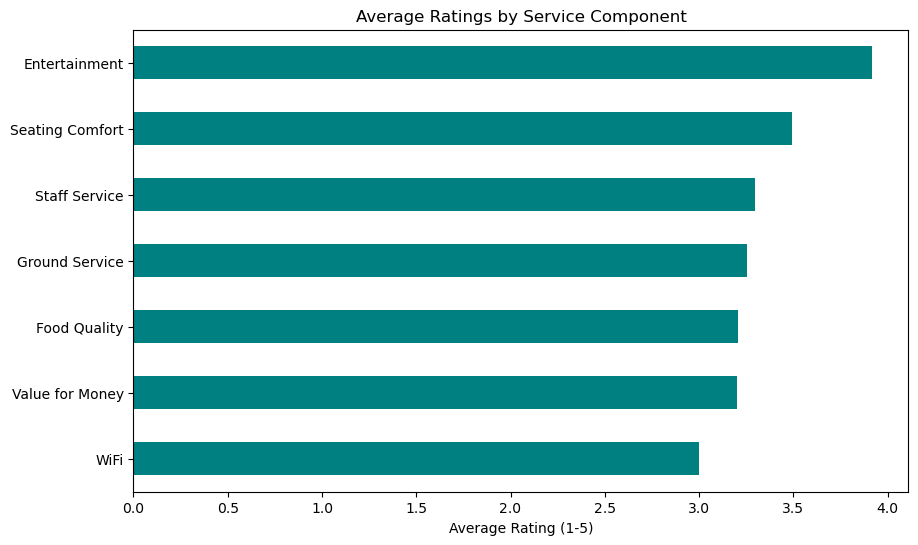

In [26]:
components = ['Seating Comfort', 'Staff Service', 'Food Quality', 
              'Entertainment', 'WiFi', 'Ground Service', 'Value for Money']
component_means = data[components].mean().sort_values()

plt.figure(figsize=(10, 6))
component_means.plot(kind='barh', color='teal')
plt.title('Average Ratings by Service Component')
plt.xlabel('Average Rating (1-5)')
plt.show()

In [ ]:
positive_reviews = ' '.join(data[data['Overall Rating'] >= 7]['Review'].dropna())
negative_reviews = ' '.join(data[data['Overall Rating'] <= 4]['Review'].dropna())

plt.figure(figsize=(15, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Frequent Words in Positive Reviews (Rating ≥7)')
plt.axis('off')
plt.show()

plt.figure(figsize=(15, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Frequent Words in Negative Reviews (Rating ≤4)')
plt.axis('off')
plt.show()

# Sentiment Analysis


In [ ]:
def get_sentiment(text):
    if pd.isna(text):
        return 0
    return TextBlob(str(text)).sentiment.polarity

data['Sentiment'] = data['Review'].apply(get_sentiment)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Recommended', y='Sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Analysis by Recommendation')
plt.xlabel('Recommended (yes/no)')
plt.ylabel('Sentiment Polarity (-1 to 1)')
plt.show()

In [ ]:
# Plot 6: Rating Trends Over Time (if enough date data)
if df['Date Published'].notna().sum() > 0:
    plt.figure(figsize=(12, 6))
    monthly_avg = df.set_index('Date Published').resample('M')['Overall Rating'].mean()
    monthly_avg.plot()
    plt.title('Monthly Average Rating Trend')
    plt.ylabel('Average Rating')
    plt.xlabel('Date')
    plt.grid(True)
    plt.show()